In [8]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [9]:
data = './heart-disease-dataset/heart_cleveland_upload.csv'
df = pd.read_csv(data)
df.head()
# df.fillna(999, inplace=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [10]:
X =  df.drop(columns=['condition'])
y = df['condition']
print(X.shape)
print(y.shape)

(297, 13)
(297,)


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
print(x_train.shape)
print(x_test.shape)

(222, 13)
(75, 13)


In [12]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt = dt.fit(x_train, y_train)
# clf = tree.DecisionTreeClassifier(random_state=0)
# clf.fit(x_train,y_train)
clf = dt
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

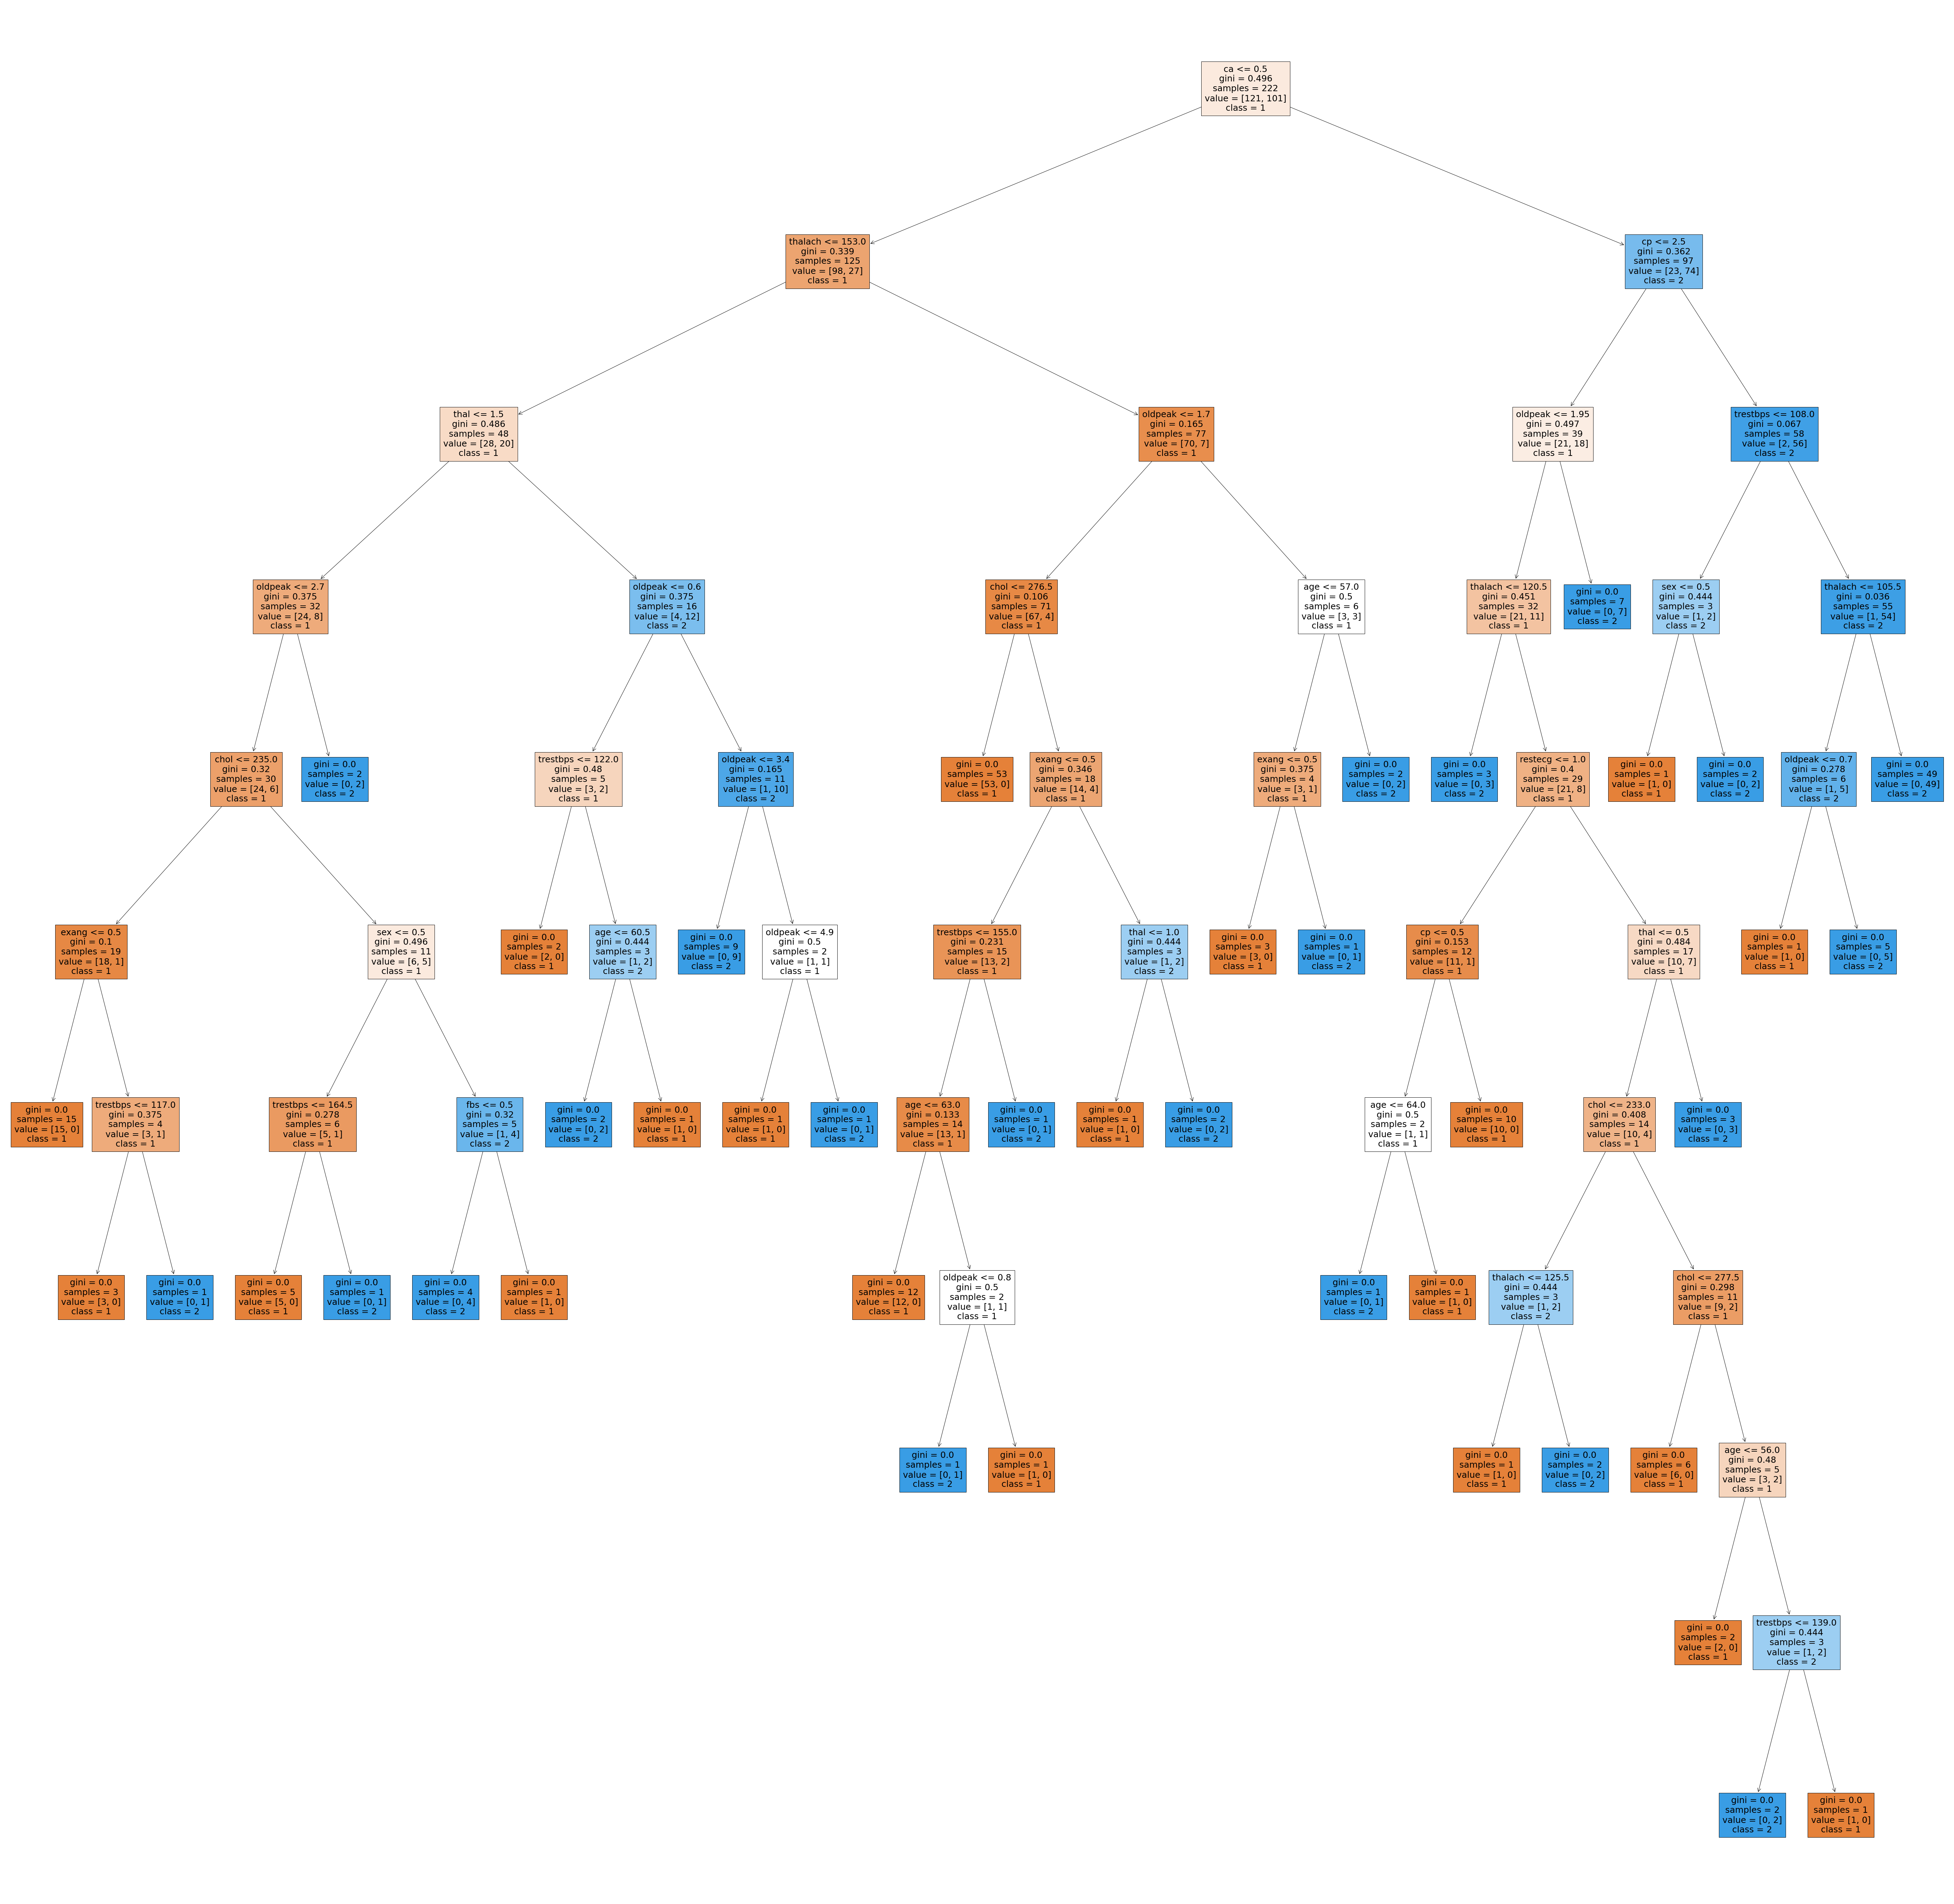

In [13]:
plt.figure(figsize=(100, 100))
features = df.columns
classes = ['1', '2']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [11]:
params = {'max_depth': [2,4,6,8],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)
model = gcv.best_estimator_
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=5)

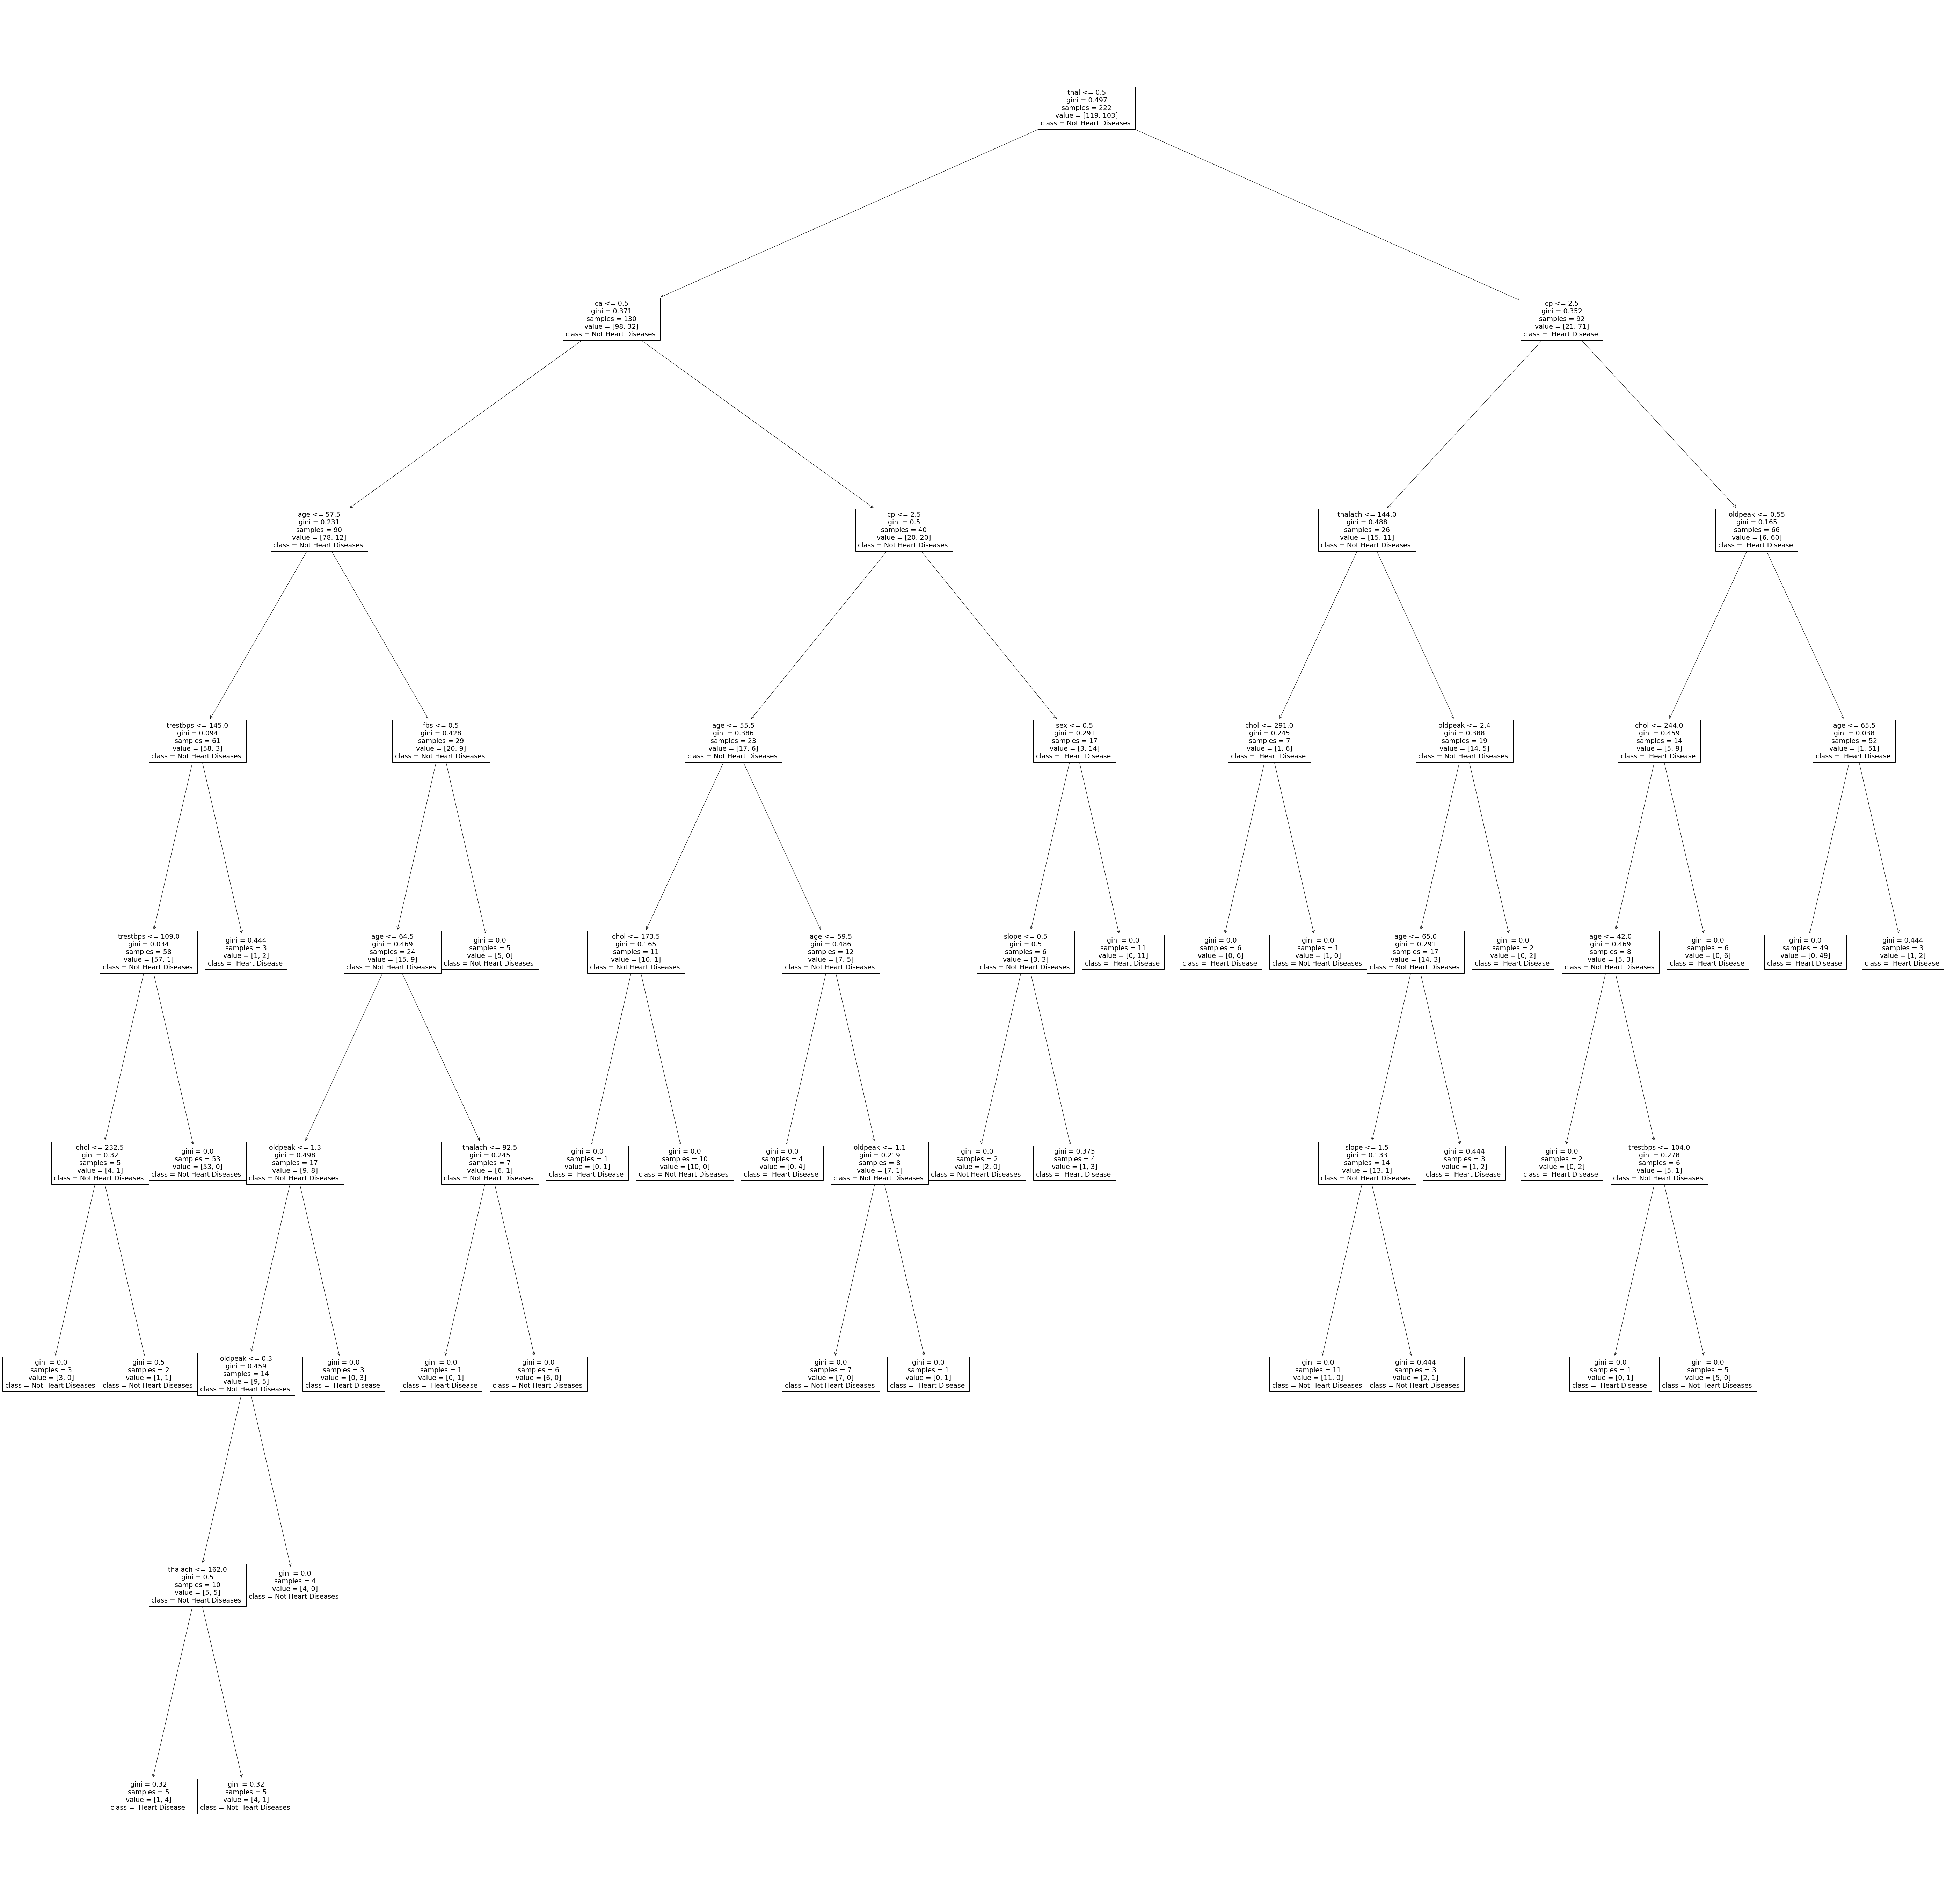

In [14]:
plt.figure(figsize=(100, 100))
features = df.columns
classes =  ['Not Heart Diseases ', ' Heart Disease ']
# classes = ['1','2','3','4','5','6', '7','8','9','10','11','12']
tree.plot_tree(model,feature_names=features,class_names=classes)
plt.show()